In [2]:
display_df <- read.delim('display_name2.txt',header = F, sep = '\t')
mean_location_df <- read.delim('mean_location_coordinates.txt',header = F,encoding='UTF-8', sep = '\t')

In [3]:
nrow(display_df)


[1] 2710

In [4]:
nrow(mean_location_df)

[1] 2710

In [5]:
library("igraph")
edgelistFile<-read.table("location_edge_list.txt")
g=graph.data.frame(edgelistFile, directed=F)
g = set_edge_attr(g, 'weight', index = E(g), E(g)$V3)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [6]:
g_mst = mst(g, weights = E(g)$weight)

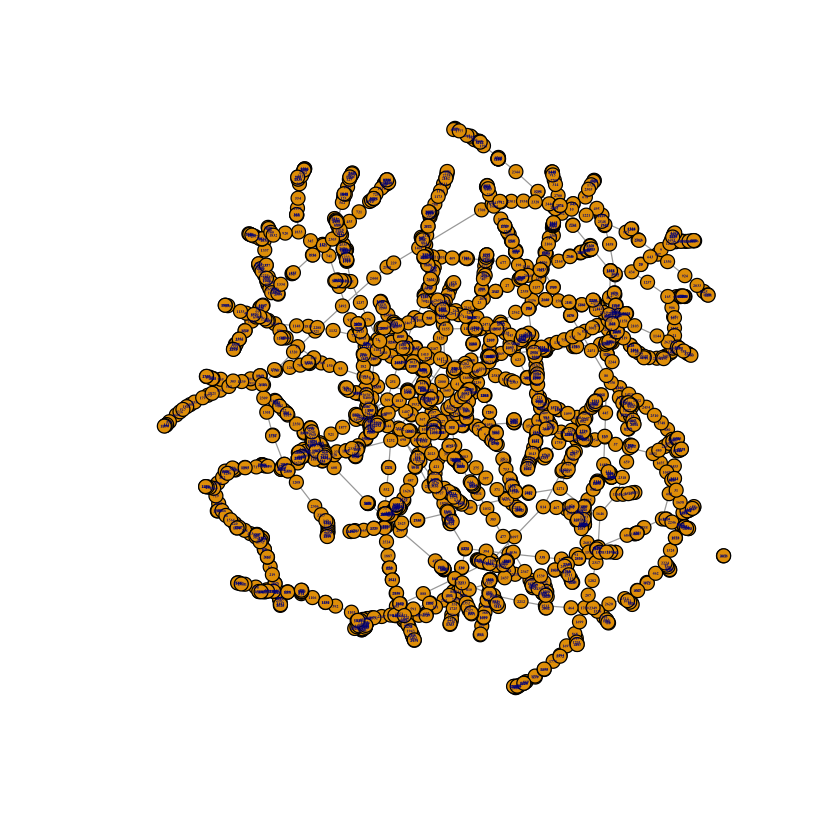

In [7]:
plot(g_mst,vertex.size=5,vertex.label.family="Times",vertex.label.font=2,vertex.label.cex=.2)

In [8]:
for(i in c(1:10)){
    edges = E(g_mst)
    e = edges[i*50]
    vl = c(ends(g_mst,e))
    cat(vl[1],vl[2])
    cat('\n')
    
    v1name = as.vector(display_df[,2])[which(display_df$V1 == vl[1])]
    v2name = as.vector(display_df[,2])[which(display_df$V1 == vl[2])]
    cat(v1name,'|',v2name)
    cat('\n')
}

2239 1399
1900 Ballybunion Court, Gilroy | Levee, Gilroy
2482 415
800 Palisade Drive, Martinez | 5400 Imhoff Drive, Martinez
2135 499
0 Fairway Drive, Mill Valley | 600 Throckmorton Avenue, Mill Valley
822 1286
200 Rodrigues Avenue, Milpitas | 1300 Chewpon Avenue, Milpitas
2067 840
3100 Linda Vista Avenue, Napa | 2100 West F Street, Napa
2467 526
3100 West Mendocino Avenue, Stockton | 3700 Wood Duck Circle, Lakeview, Stockton
846 2104
300 Homestead Avenue, Salinas | 0 West Gabilan Street, Salinas
2216 2214
2800 Morgan Avenue, Lincoln Highlands, Oakland | 1900 Melvin Road, Oakmore, Oakland
2368 1620
8100 Morgan Territory Road, Livermore | 14800 Byron Highway, Byron
2196 1039
Unnamed Road, Pittsburg | Stewartville Trail, Antioch


In [121]:
g

IGRAPH e8823ea UNW- 1887 538998 -- 
+ attr: name (v/c), V3 (e/n), weight (e/n)
+ edges from e8823ea (vertex names):
 [1] 1938--1952 1747--629  1872--1919 1871--1929 81  --2319 1873--1909
 [7] 232 --809  1891--1729 2423--62   650 --1829 680 --1529 542 --2251
[13] 604 --1631 660 --1729 1329--1917 2421--82   1736--739  2021--1192
[19] 550 --2171 1721--1308 1700--1518 176 --2145 1721--889  536 --2311
[25] 74  --2466 288 --326  169 --2215 99  --2216 1755--549  646 --1211
[31] 2315--528  2322--458  2307--608  1390--111  641 --1261 1872--1946
[37] 2357--108  1454--64   1729--809  2355--128  722 --1207 2307--612 
[43] 98  --2226 1074--464  1058--624  614 --1531 151 --2395 2341--268 
+ ... omitted several edges

In [11]:
combinations = data.frame(expand.grid(rep(list(1:100), 3)))
shuffeled_c = combinations[sample(nrow(combinations)),]

In [12]:
v1l <- c(shuffeled_c$Var1)
v2l <- c(shuffeled_c$Var2)
v3l <- c(shuffeled_c$Var3)

In [176]:
cnt = 0
triangle_indices = c()
for(i in c(1:6500)){
    v1 = v1l[i]
    v2 = v2l[i]
    v3 = v3l[i]
    if(v1==v2 ||v2==v3||v3==v1){
        next
    }
    if(get.edge.ids(g,c(v1l[i],v2l[i]),directed = FALSE) !=0){
        if(get.edge.ids(g,c(v3l[i],v2l[i]),directed = FALSE) !=0){
            if(get.edge.ids(g,c(v1l[i],v3l[i]),directed = FALSE)!=0){
#                 print(v1)
#                 print(v2)
#                 print(v3)
                cnt = cnt+1
#                 print(g[v1,v2, edges=TRUE])
#                 print(g[v3,v2, edges=TRUE])
#                 print(g[v1,v3, edges=TRUE])
#                 print("-------")
                triangle_indices = c(triangle_indices, i)
            }
        }
    }       
}

In [127]:
edge_l = E(g)


In [180]:
satisfied = 0
tc = 0
for(i in triangle_indices[1:1000]){
  tc = tc+1
    #print(i)
   ew1 = edge_l$weight[get.edge.ids(g,c(v1l[i],v2l[i]),directed = FALSE)]
   # print(ew1)
   ew2 = edge_l$weight[get.edge.ids(g,c(v3l[i],v2l[i]),directed = FALSE)]
   # print(ew2)
    
   ew3 = edge_l$weight[get.edge.ids(g,c(v3l[i],v1l[i]),directed = FALSE)]
   # print(ew3)
    
    #cat(v3l[i],v2l[i],v1l[i],'\n')
    
   if(ew1+ew2>ew3){
       if(ew1+ew3>ew2){
           if(ew2+ew3>ew1){
               satisfied = satisfied + 1
           }
       }
   }
    
}

In [181]:
satisfied

[1] 875